In [ ]:
# LTSM Based on: https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_random_seed(RANDOM_SEED)

In [73]:
# Load Generated Dataset (From DataGenerator_v5)
print("Reading CSV...")
df = pd.read_csv(
  '../../dataset_grouped_by_hour_boolean.csv',
  parse_dates=['timeFrom'], 
  index_col="timeFrom")
print("Done!")

Reading CSV...
Done!


In [82]:
print("Raw Dataset")
df

Raw Dataset


,isWeekday,isRain,isHoliday,TotalParkings
timeFrom,,,,
2013-01-01 07:00:00,1,0,1,13
2013-01-01 08:00:00,1,0,1,21
2013-01-01 09:00:00,1,0,1,16
2013-01-01 10:00:00,1,0,1,17
2013-01-01 11:00:00,1,0,1,18
...,...,...,...,...
2017-12-31 18:00:00,0,0,0,25
2017-12-31 19:00:00,0,0,0,22
2017-12-31 20:00:00,0,0,0,21


In [83]:
# Remove the time data from closed parking
print("Only Parking Opening Hours")
df = df[df['TotalParkings'] > 0]
df

Only Parking Opening Hours


,isWeekday,isRain,isHoliday,TotalParkings
timeFrom,,,,
2013-01-01 07:00:00,1,0,1,13
2013-01-01 08:00:00,1,0,1,21
2013-01-01 09:00:00,1,0,1,16
2013-01-01 10:00:00,1,0,1,17
2013-01-01 11:00:00,1,0,1,18
...,...,...,...,...
2017-12-31 18:00:00,0,0,0,25
2017-12-31 19:00:00,0,0,0,22
2017-12-31 20:00:00,0,0,0,21


In [84]:
# Preserve Single Variable (Only Time and TotalParkings)
print("Only Parking Time and Total Parkings")
df2 = df.copy()
df2 = df2.drop(df2.columns.difference(['timeFrom','TotalParkings']), axis=1)
df2

Only Parking Time and Total Parkings


,TotalParkings
timeFrom,
2013-01-01 07:00:00,13
2013-01-01 08:00:00,21
2013-01-01 09:00:00,16
2013-01-01 10:00:00,17
2013-01-01 11:00:00,18
...,...
2017-12-31 18:00:00,25
2017-12-31 19:00:00,22
2017-12-31 20:00:00,21


Generating Graph...


No handles with labels found to put in legend.


Done!


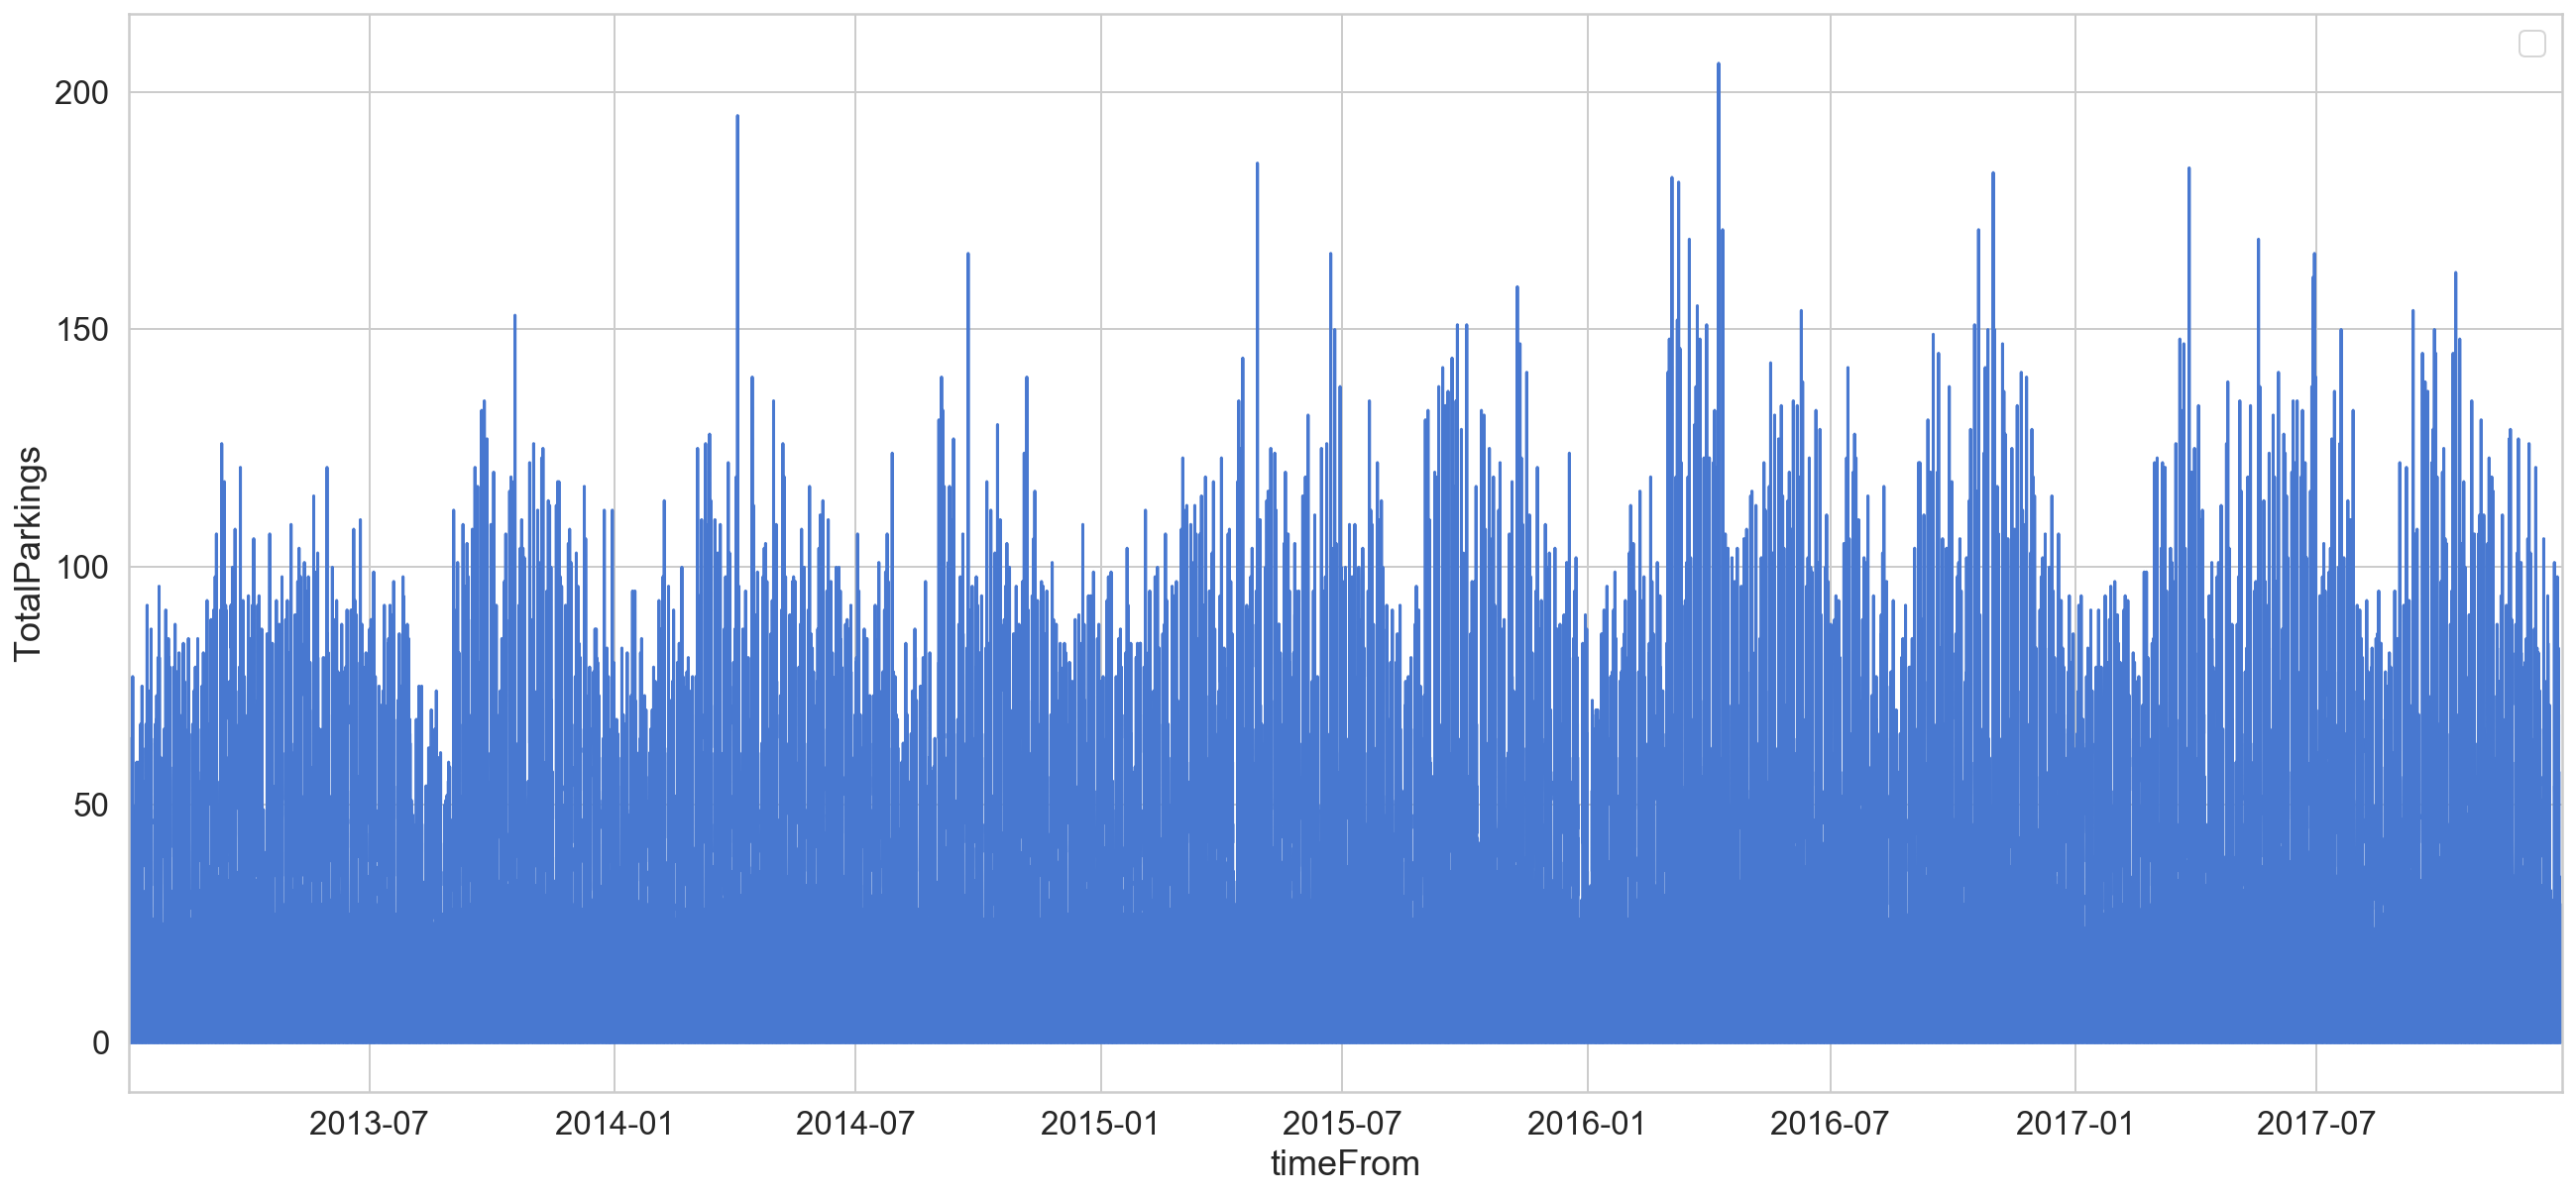

In [75]:
print("Generating Graph...")
sns.lineplot(x=df2.index, y="TotalParkings", data=df2);
plt.margins(x=0)
print("Done!")

In [100]:
train_size = int(len(df2) * 0.9)
test_size = len(df2) - train_size
train, test = df2.iloc[0:train_size], df2.iloc[train_size:len(df2)]
print(len(train), len(test))

26294 2922


In [101]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [136]:
time_steps = 16 # 16 * 7

X_train, y_train = create_dataset(train, train.TotalParkings, time_steps)
X_test, y_test = create_dataset(test, test.TotalParkings, time_steps)

print(X_train.shape, y_train.shape)

(26278, 16, 1) (26278,)


In [137]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))
print("DONE!")

DONE!


In [138]:
history = model.fit(
    X_train, y_train, 
    epochs=500, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Train on 23650 samples, validate on 2628 samples
Epoch 1/500
23650/23650 [==============================] - 23s 987us/sample - loss: 385.3556 - val_loss: 298.9191
Epoch 2/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 207.8475 - val_loss: 263.3403
Epoch 3/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 177.7394 - val_loss: 228.5570
Epoch 4/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 167.0980 - val_loss: 183.0647
Epoch 5/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 160.6426 - val_loss: 176.5476
Epoch 6/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 155.9725 - val_loss: 187.6579
Epoch 7/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 154.6180 - val_loss: 179.3373
Epoch 8/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 152.3459 - val_loss: 168.6597
Epoch 9/500
23650/23650 [============================

23650/23650 [==============================] - 30s 1ms/sample - loss: 105.0818 - val_loss: 131.4169
Epoch 73/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 105.7379 - val_loss: 133.8348
Epoch 74/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 105.8012 - val_loss: 132.1063
Epoch 75/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 105.4810 - val_loss: 136.4866
Epoch 76/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 107.5318 - val_loss: 131.0948
Epoch 77/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 106.1790 - val_loss: 131.9221
Epoch 78/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 105.8560 - val_loss: 127.9050
Epoch 79/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 105.2439 - val_loss: 131.9513
Epoch 80/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 103.6645 - val_loss: 129.7

23650/23650 [==============================] - 30s 1ms/sample - loss: 93.3257 - val_loss: 133.1876
Epoch 145/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 95.5056 - val_loss: 135.1040
Epoch 146/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 93.5256 - val_loss: 130.0410
Epoch 147/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 92.5747 - val_loss: 141.7497
Epoch 148/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 97.3878 - val_loss: 134.0486
Epoch 149/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 92.6107 - val_loss: 134.7295
Epoch 150/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 92.2173 - val_loss: 133.4462
Epoch 151/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 92.4657 - val_loss: 136.5782
Epoch 152/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 93.5722 - val_loss: 140.31

23650/23650 [==============================] - 30s 1ms/sample - loss: 81.0143 - val_loss: 135.1303
Epoch 217/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 81.9153 - val_loss: 140.2287
Epoch 218/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 83.5232 - val_loss: 137.9494
Epoch 219/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 83.0052 - val_loss: 136.7746
Epoch 220/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 83.3232 - val_loss: 143.5543
Epoch 221/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 85.6615 - val_loss: 139.1719
Epoch 222/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 83.0491 - val_loss: 137.3539
Epoch 223/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 82.4937 - val_loss: 135.6372
Epoch 224/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 81.5628 - val_loss: 138.07

23650/23650 [==============================] - 30s 1ms/sample - loss: 75.2636 - val_loss: 142.3104
Epoch 289/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 79.6068 - val_loss: 145.3017
Epoch 290/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 74.6712 - val_loss: 143.6347
Epoch 291/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 77.9666 - val_loss: 145.9828
Epoch 292/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 77.8985 - val_loss: 146.7443
Epoch 293/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 74.6348 - val_loss: 146.2138
Epoch 294/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 80.2019 - val_loss: 143.2375
Epoch 295/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 80.5134 - val_loss: 150.4287
Epoch 296/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 77.5695 - val_loss: 153.79

23650/23650 [==============================] - 30s 1ms/sample - loss: 76.6561 - val_loss: 141.9521
Epoch 361/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 73.9411 - val_loss: 150.6917
Epoch 362/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 75.0553 - val_loss: 144.7430
Epoch 363/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 77.2212 - val_loss: 148.0044
Epoch 364/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 79.9735 - val_loss: 145.4099
Epoch 365/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 71.9331 - val_loss: 146.0806
Epoch 366/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 76.8193 - val_loss: 152.6662
Epoch 367/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 77.1013 - val_loss: 143.2388
Epoch 368/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 72.4646 - val_loss: 152.38

23650/23650 [==============================] - 30s 1ms/sample - loss: 74.7104 - val_loss: 157.0229
Epoch 433/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 79.3122 - val_loss: 157.1087
Epoch 434/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 75.7696 - val_loss: 145.7129
Epoch 435/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 74.5731 - val_loss: 148.5574
Epoch 436/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 75.6001 - val_loss: 152.0337
Epoch 437/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 72.3483 - val_loss: 153.7577
Epoch 438/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 81.3466 - val_loss: 149.2009
Epoch 439/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 74.6727 - val_loss: 149.2559
Epoch 440/500
23650/23650 [==============================] - 30s 1ms/sample - loss: 73.9578 - val_loss: 153.37

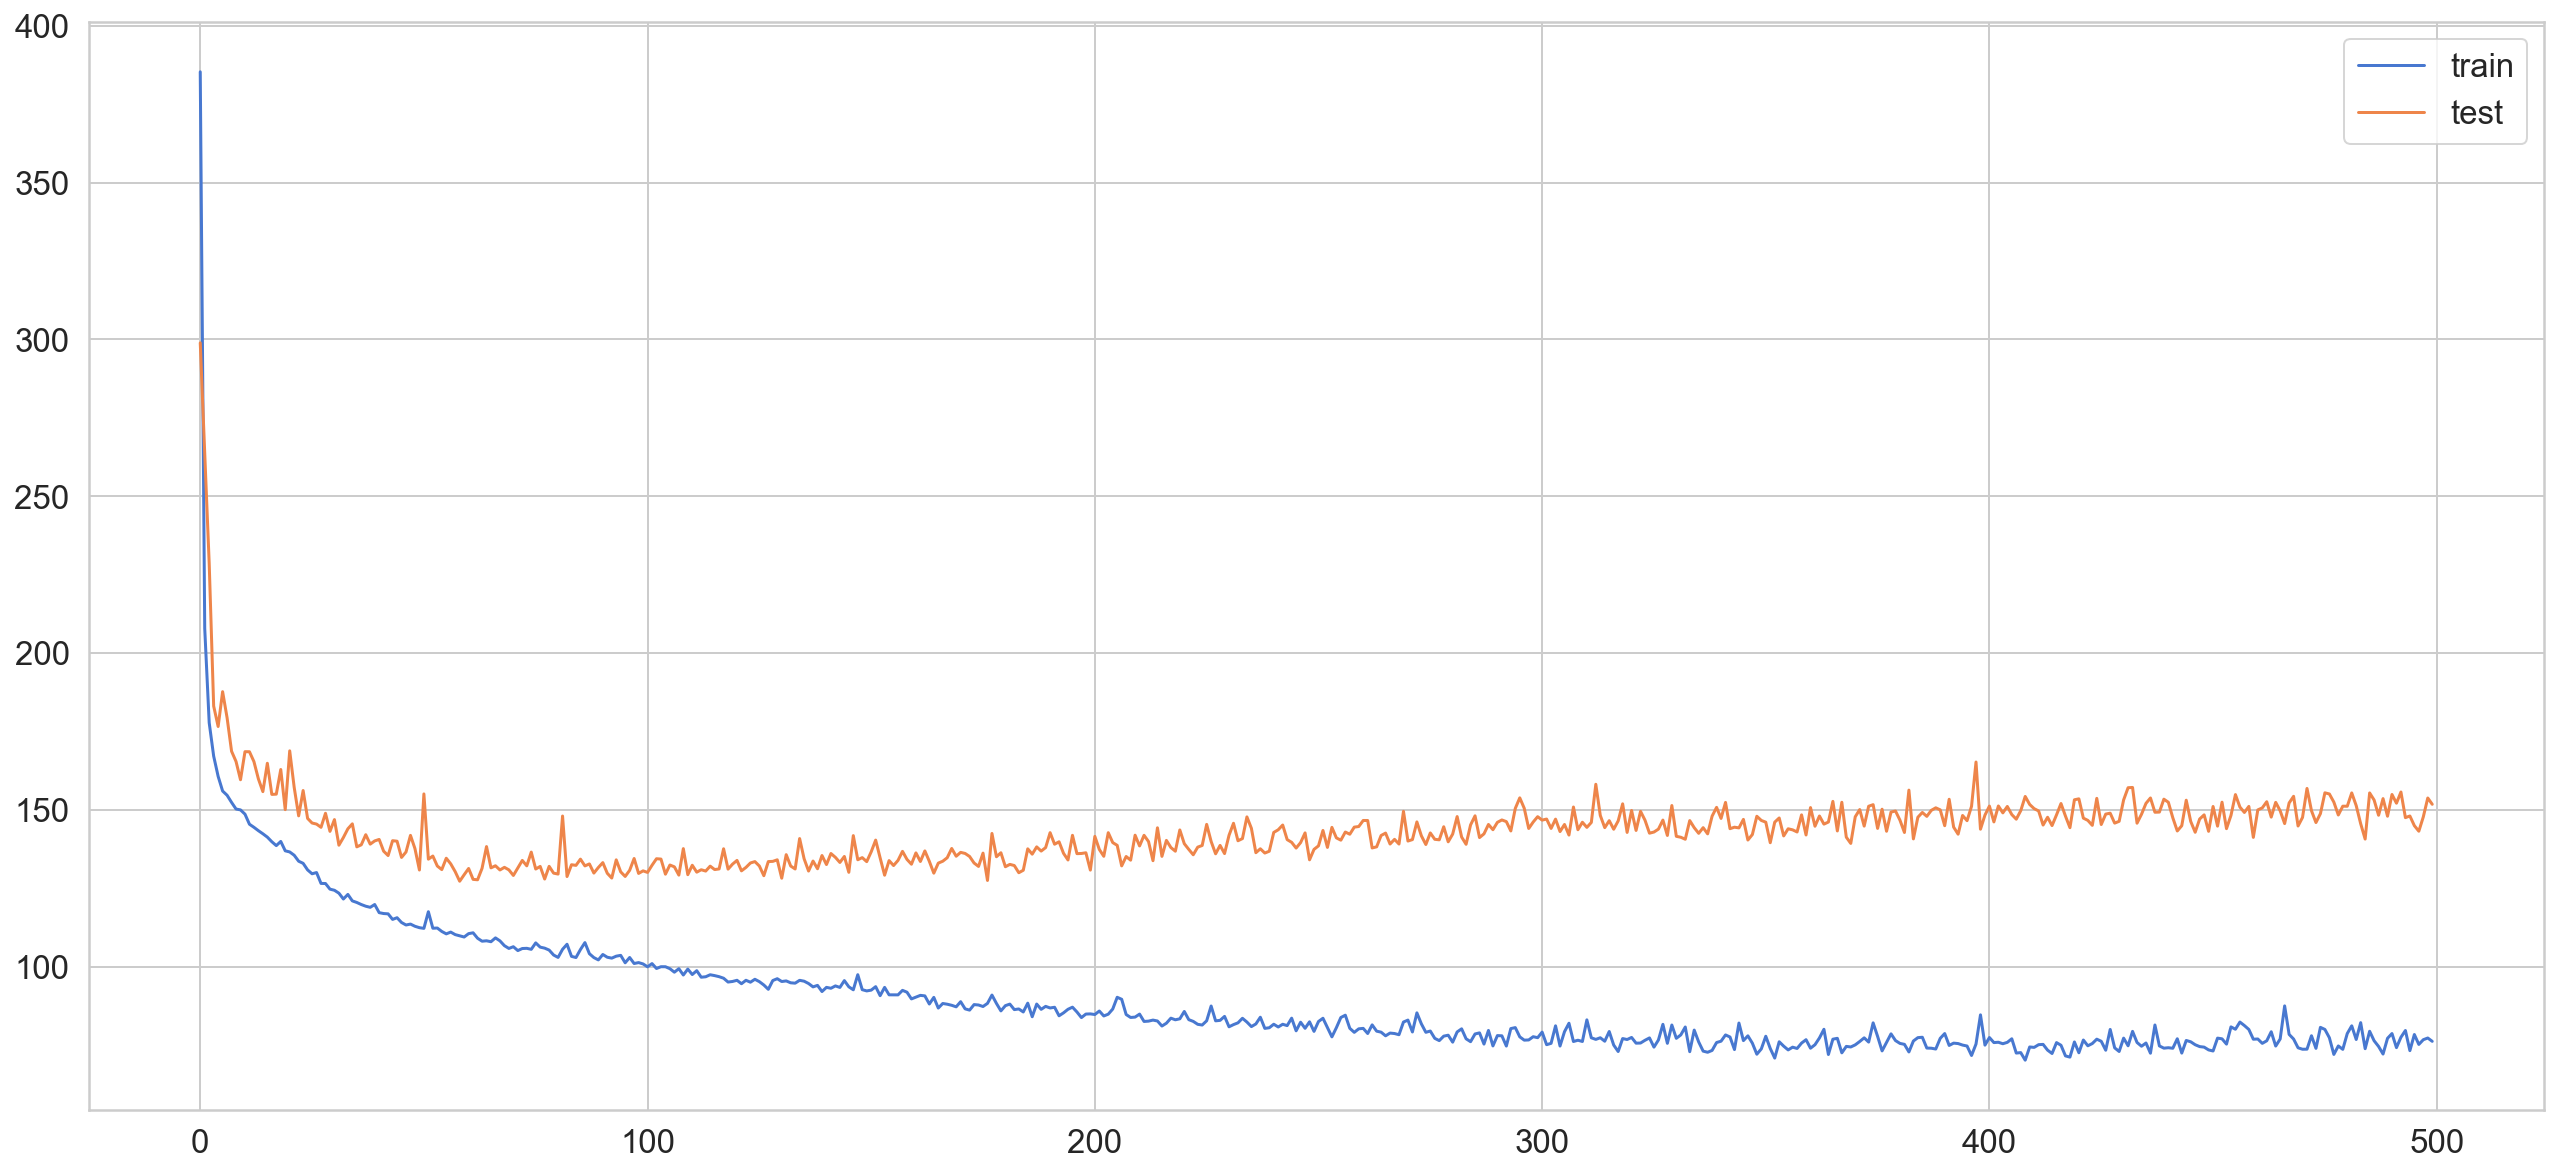

In [139]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [140]:
y_pred = model.predict(X_test)

y_pred

array([[43.59737 ],
       [44.904037],
       [54.24189 ],
       ...,
       [21.707493],
       [17.973682],
       [19.2961  ]], dtype=float32)

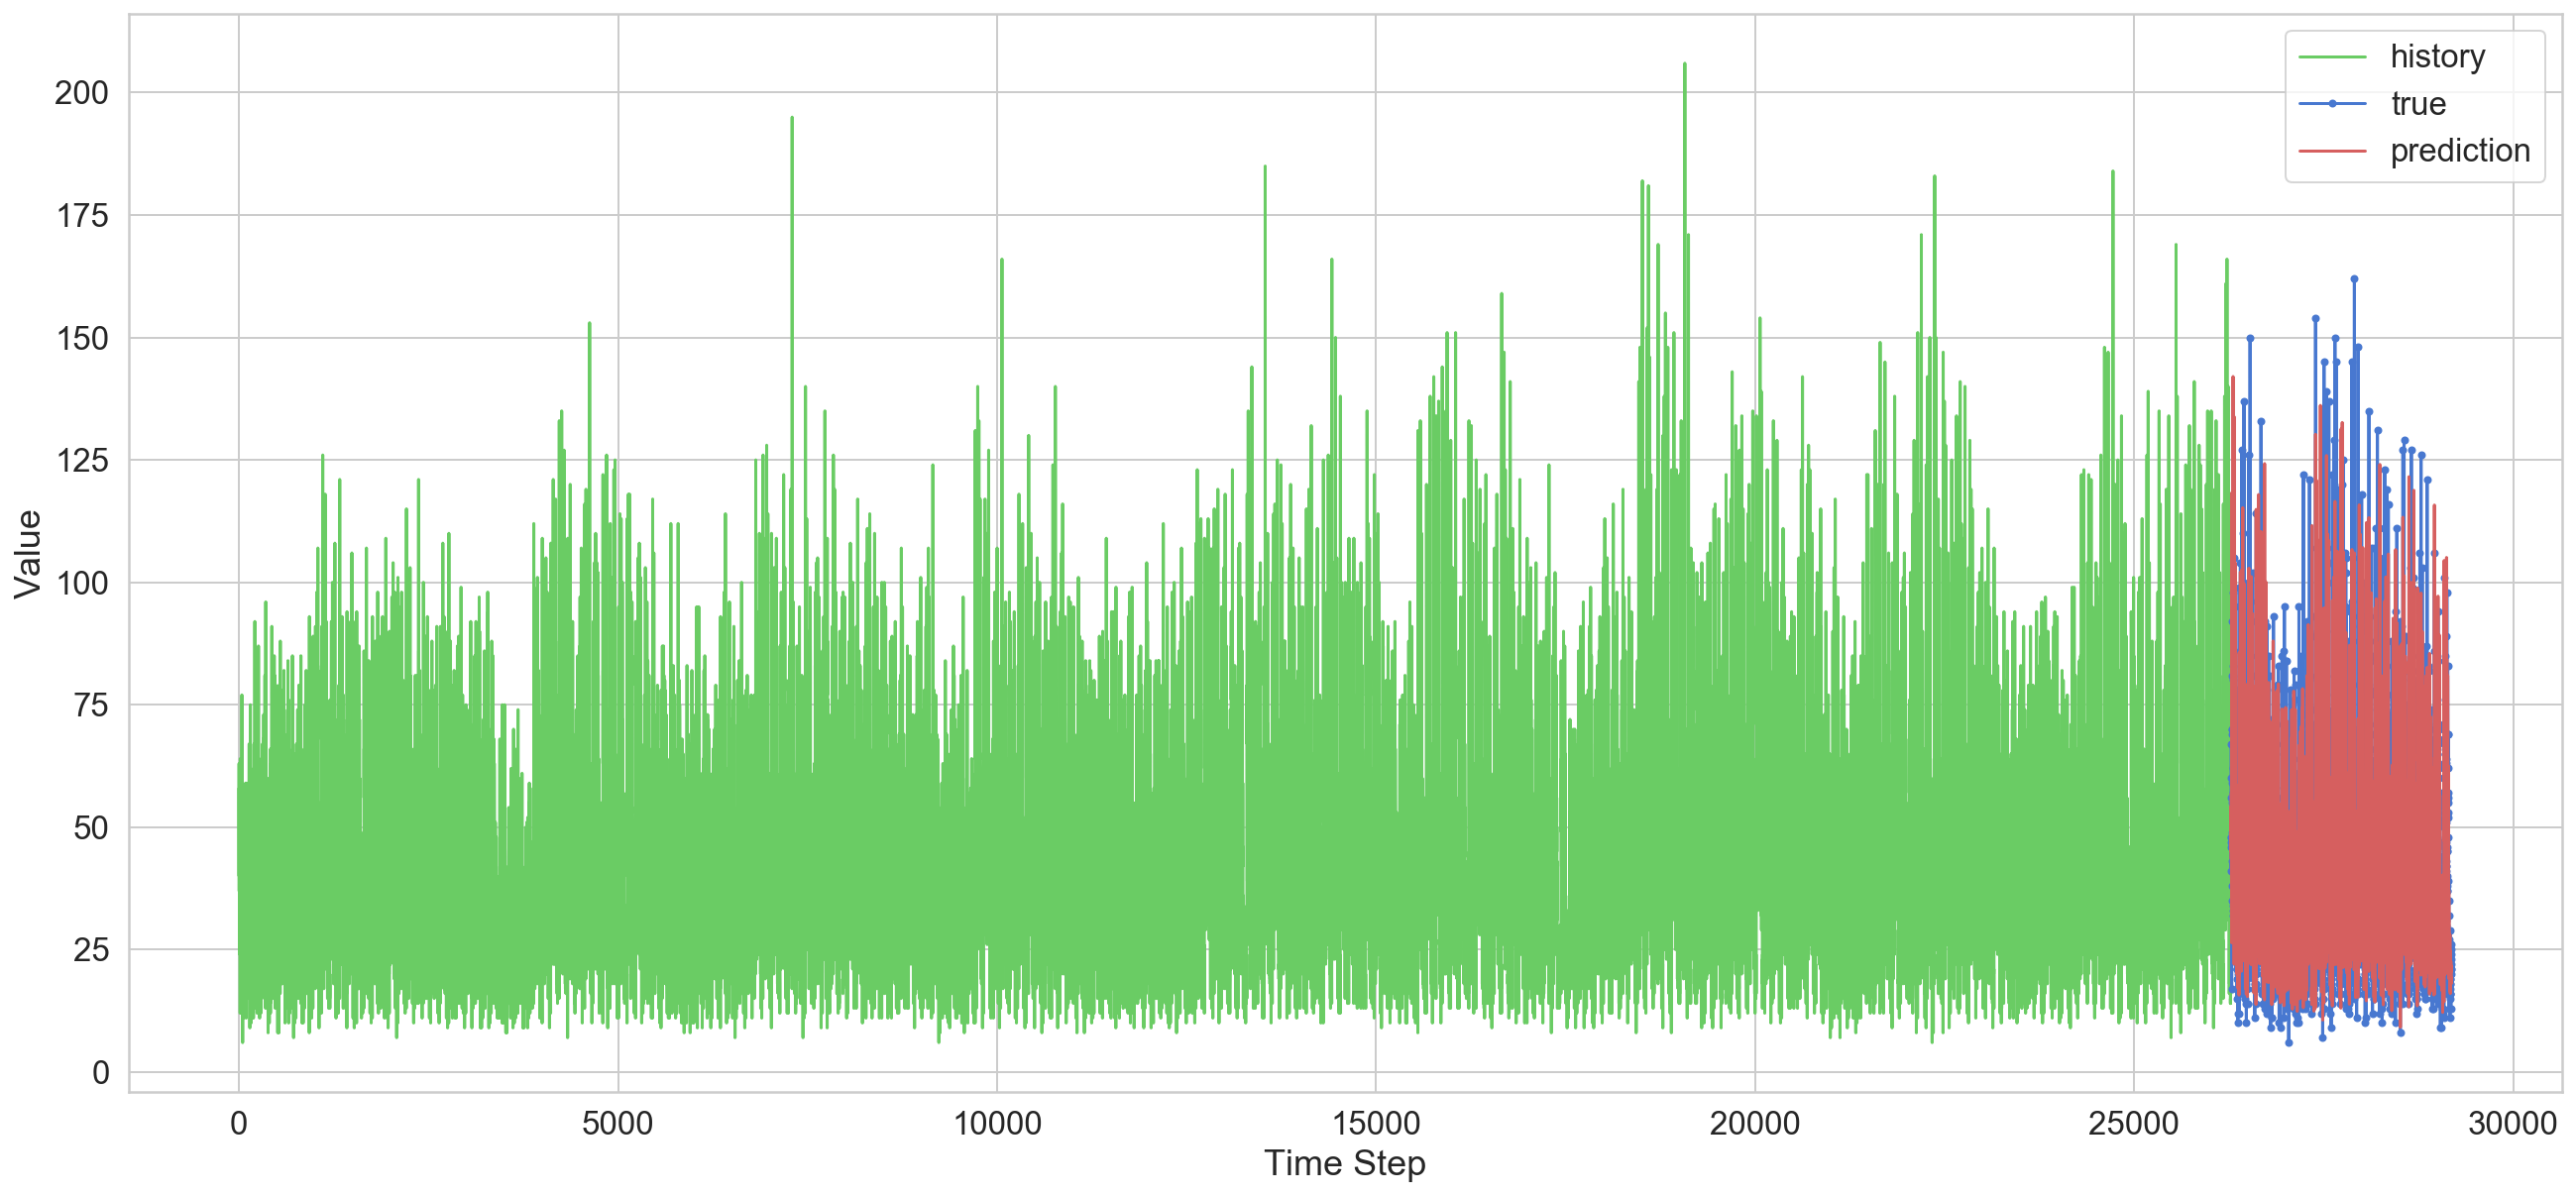

In [141]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

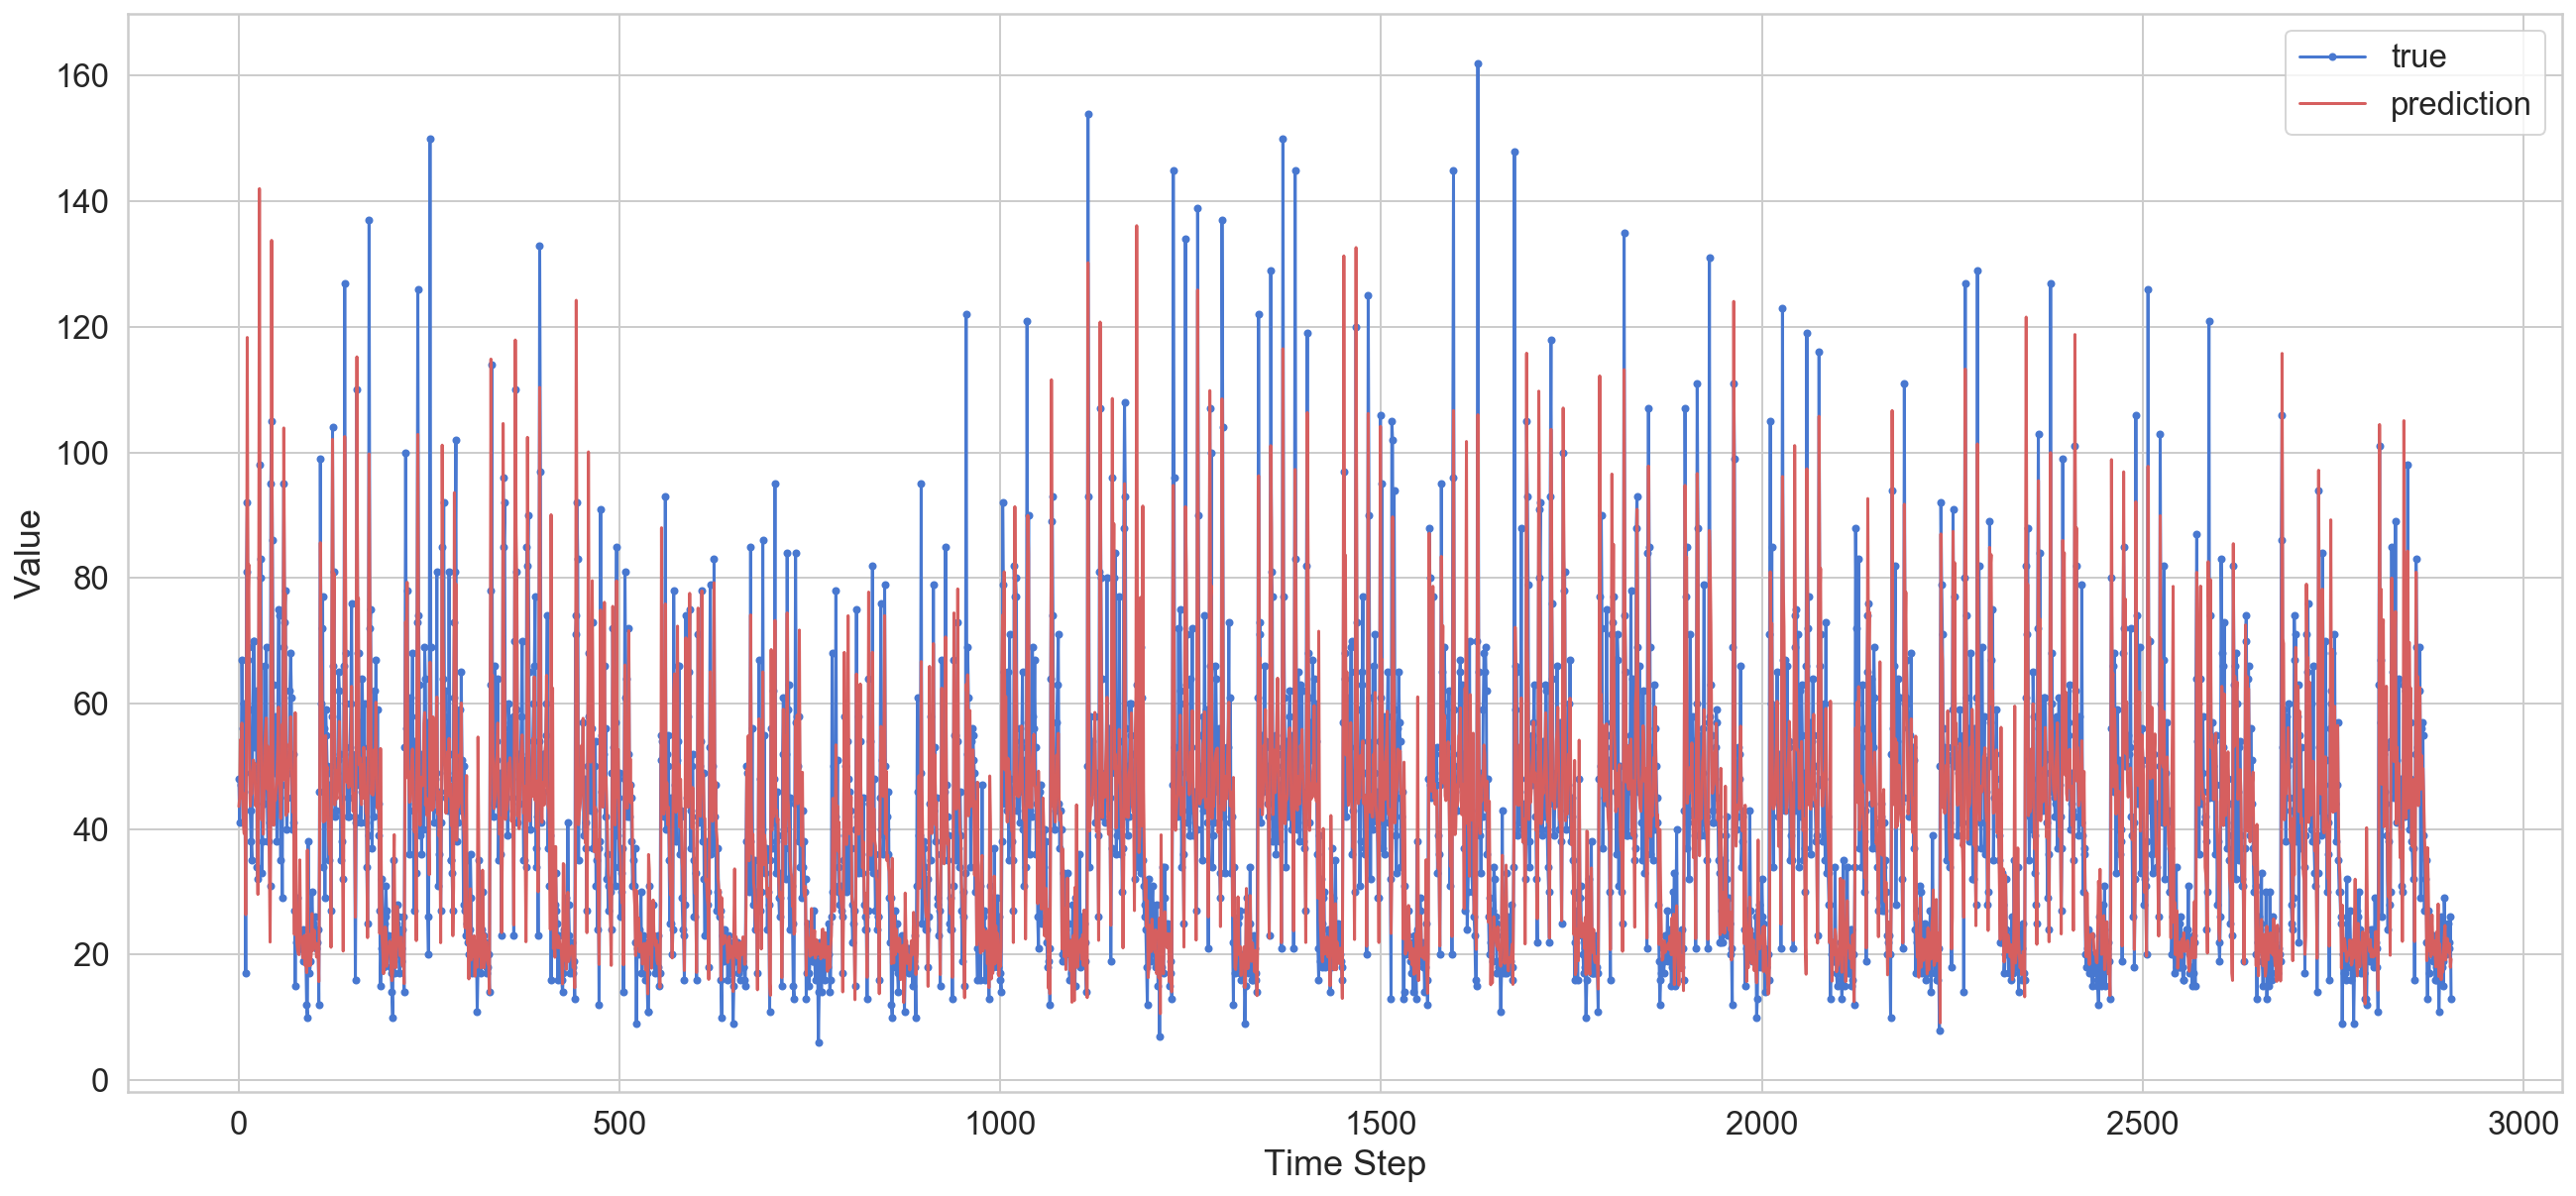

In [142]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [143]:
savedf = pd.DataFrame(y_test, columns=['real'])
savedf['predict'] = y_pred
savedf['accuracy'] = savedf.apply((lambda x : (1 - abs(x['real'] - x['predict']) / x['real']) if x['real']>0 else 1),axis=1)
savedf

,real,predict,accuracy
0,48,43.597370,0.908279
1,41,44.904037,0.904780
2,47,54.241890,0.845917
3,48,44.952625,0.936513
4,67,56.892284,0.849139
...,...,...,...
2901,25,21.785044,0.871402
2902,22,20.407459,0.927612
2903,21,21.707493,0.966310
2904,26,17.973682,0.691295


In [144]:
model.save('model_singlevariable_500epo_16timesteps') 
print("Done!")

Done!


In [145]:
print("Total Amount of Data Predicted: ", len(savedf))
print()
gt_95 = len(savedf[savedf['accuracy'] >= 0.95])
gt_90 = len(savedf[savedf['accuracy'] >= 0.90])
gt_75 = len(savedf[savedf['accuracy'] >= 0.75])
gt_low = len(savedf[savedf['accuracy'] < 0.75])
print("Predict Accuracy Greather Than 95%: ",gt_95, " - ", round((1 - ((abs((gt_95) - len(savedf))) / len(savedf)))*100,2),"% of the Total")
print("Predict Accuracy Greather Than 90%: ",gt_90, " - ", round((1 - ((abs((gt_90) - len(savedf))) / len(savedf)))*100,2),"% of the Total")
print()
print("Predict Accuracy Greather Than 75%: ",gt_75, " - ", round((1 - ((abs((gt_75) - len(savedf))) / len(savedf)))*100,2),"% of the Total")
print("Predict Accuracy Lower Than 75%: ",gt_low, " - ", round((1 - ((abs((gt_low) - len(savedf))) / len(savedf)))*100,2),"% of the Total")


Total Amount of Data Predicted:  2906

Predict Accuracy Greather Than 95%:  535  -  18.41 % of the Total
Predict Accuracy Greather Than 90%:  1026  -  35.31 % of the Total

Predict Accuracy Greather Than 75%:  2152  -  74.05 % of the Total
Predict Accuracy Lower Than 75%:  754  -  25.95 % of the Total


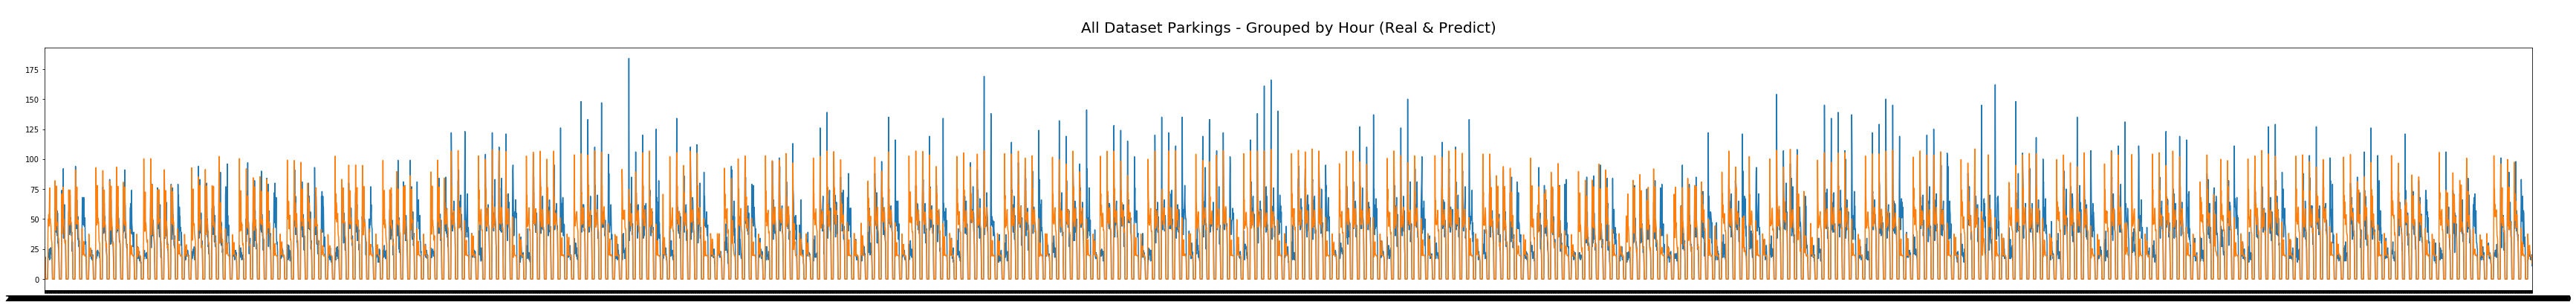

In [60]:
plt.subplots(figsize=(60,6))
plt.title("\nAll Dataset Parkings - Grouped by Hour (Real & Predict)", fontsize=20, pad=20)
plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))

plt.plot(test3.index, test3.TotalParkings, label = "Real Value")
plt.plot(test3.index, test3.TotalParkings2, label = "Predict Value")

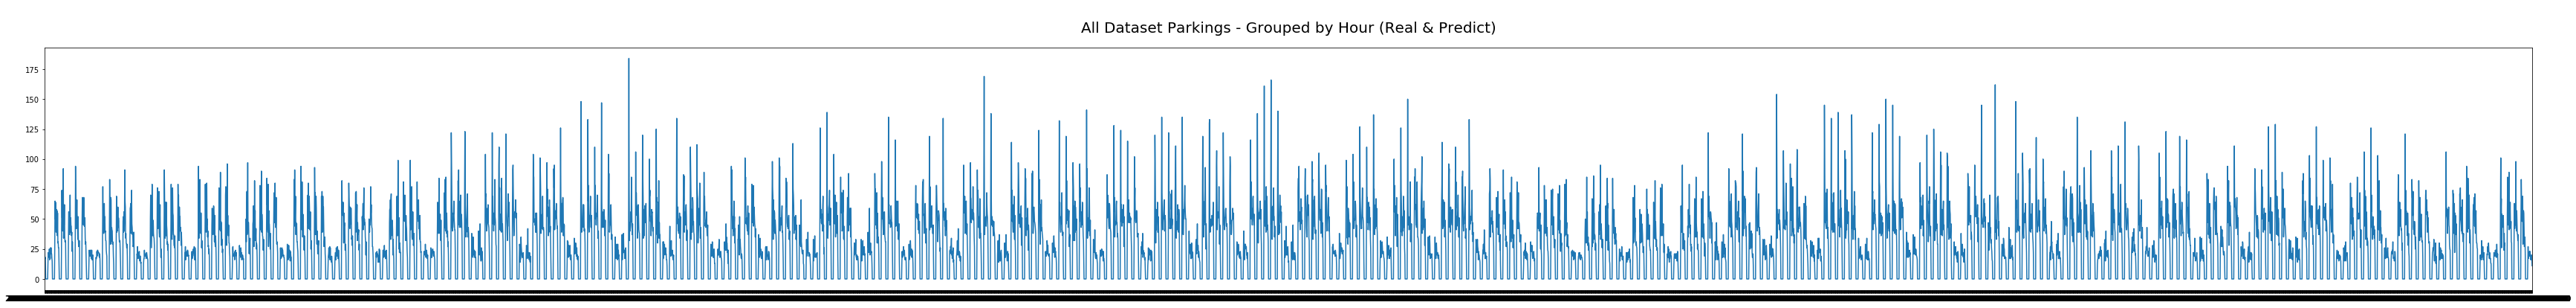

In [62]:
plt.subplots(figsize=(60,6))
plt.title("\nAll Dataset Parkings - Grouped by Hour (Real & Predict)", fontsize=20, pad=20)
plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))

plt.plot(test3.index, test3.TotalParkings, label = "Real Value")

In [56]:
#test3 = test2.copy()
#test3['TotalParkings2'] = test3.apply((lambda x : 0 if x['TotalParkings2']<0 else x['TotalParkings2']),axis=1)
#test3

,TotalParkings,TotalParkings2
timeFrom,,
2016-12-31 19:00:00,26,19.918528
2016-12-31 20:00:00,19,19.321749
2016-12-31 21:00:00,17,18.245909
2016-12-31 22:00:00,18,12.773067
2016-12-31 23:00:00,0,0.000000
...,...,...
2017-12-30 18:00:00,16,19.103045
2017-12-30 19:00:00,18,19.550055
2017-12-30 20:00:00,20,19.350130


In [61]:
test3['Accuracy'] = test3.apply((lambda x : (1 - abs(x['TotalParkings'] - x['TotalParkings2']) / x['TotalParkings']) if x['TotalParkings']>0 else 1),axis=1)
#test3['Accuracy'] = 1 - ((abs(test3['TotalParkings'] - test3['TotalParkings2'])) / test3['TotalParkings'])

test3

,TotalParkings,TotalParkings2,Accuracy
timeFrom,,,
2016-12-31 19:00:00,26,19.918528,0.766097
2016-12-31 20:00:00,19,19.321749,0.983066
2016-12-31 21:00:00,17,18.245909,0.926711
2016-12-31 22:00:00,18,12.773067,0.709615
2016-12-31 23:00:00,0,0.000000,1.000000
...,...,...,...
2017-12-30 18:00:00,16,19.103045,0.806060
2017-12-30 19:00:00,18,19.550055,0.913886
2017-12-30 20:00:00,20,19.350130,0.967507
